In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\ThoraricSurgery.csv")

data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [4]:
data.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


In [5]:

data.isna().sum()

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

In [6]:
data.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


In [7]:
# Compute correlation only on numeric columns
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix


,id,PRE4,PRE5,AGE
id,1.000000,-0.034985,0.029563,-0.005826
PRE4,-0.034985,1.000000,0.032975,-0.290178
PRE5,0.029563,0.032975,1.000000,-0.115900
AGE,-0.005826,-0.290178,-0.115900,1.000000


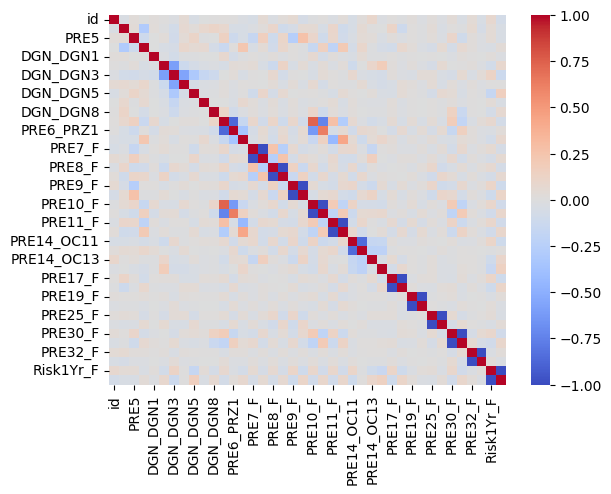

In [8]:
encoded_data = pd.get_dummies(data)
sns.heatmap(encoded_data.corr(), cmap='coolwarm')
plt.show()


In [9]:
data[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25',
     'PRE30', 'PRE32']] = data[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
                            'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']].apply(lambda x: np.where(x == 'T', 1, 0))

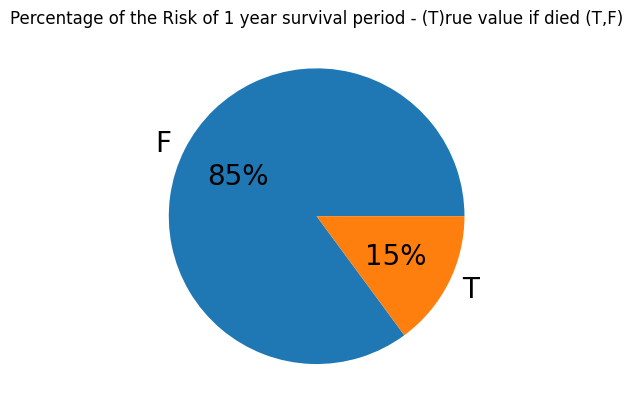

In [10]:
#Percentage of the Risk of 1 year survival period¶
data.groupby('Risk1Yr').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the Risk of 1 year survival period - (T)rue value if died (T,F)')
plt.show()


In [11]:
#Observation
#85% of the patients were not survivied within the 1 year of survival period
data['DGN'].value_counts()

DGN
DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: count, dtype: int64

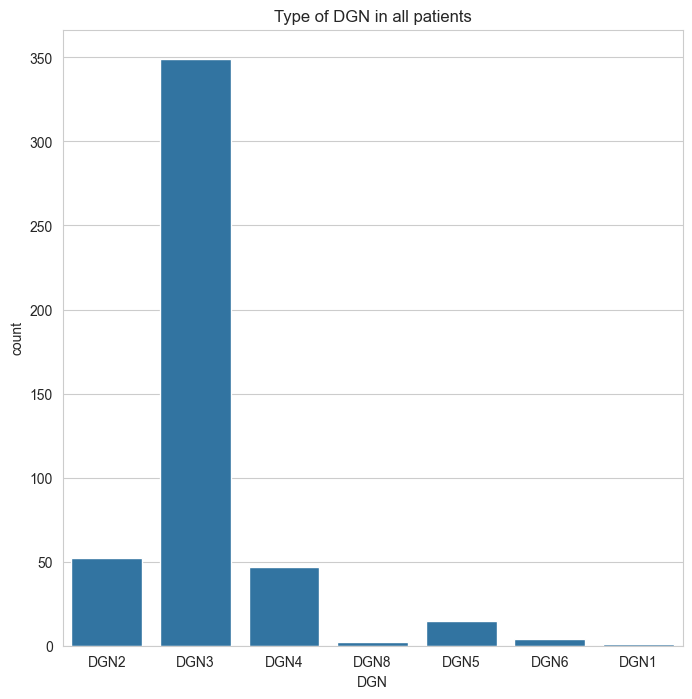

In [12]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of DGN in all patients")

sns.set(font_scale=2)
sns.countplot(x='DGN', data=data)
plt.show()

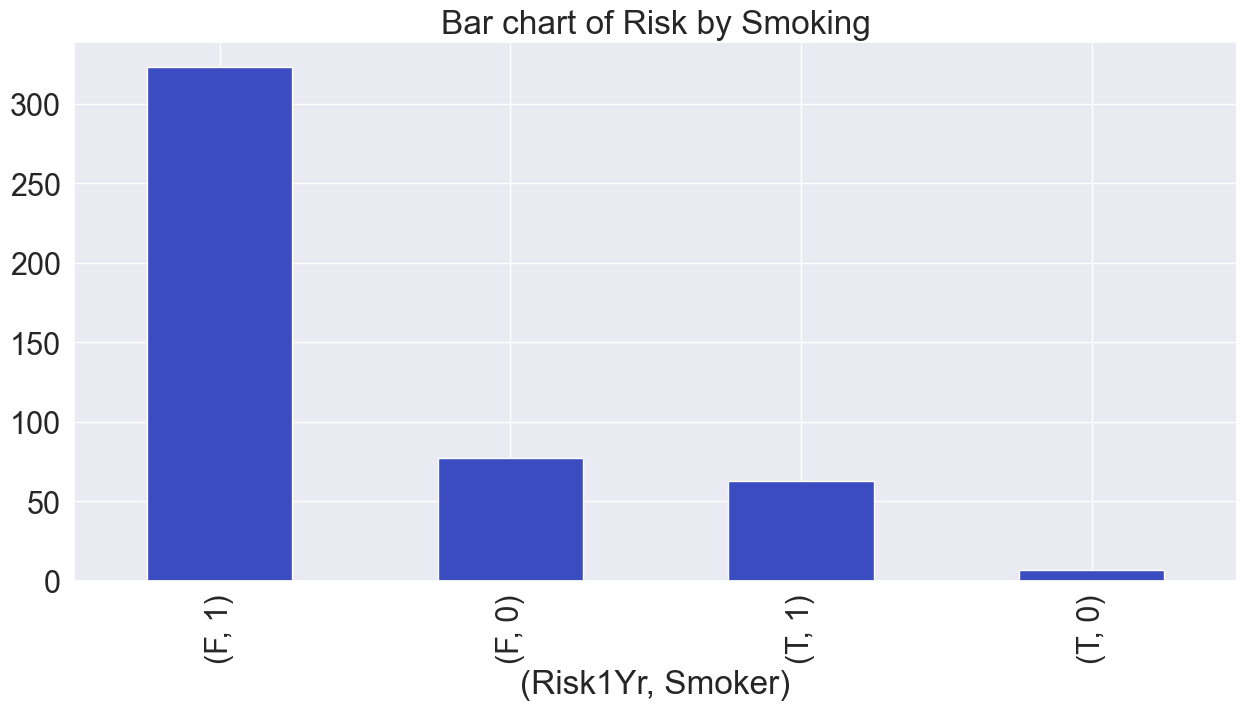

In [13]:
#Observation
#DGN3 is the most common code that was present in all patients.
#As you know smoking is bad for your health. Let's see if it had an effect on patients.
fig, ax = plt.subplots(figsize=(15,7))

data.groupby('Risk1Yr')['PRE30'].value_counts().plot(ax=ax, kind='bar',
                                                    title = 'Bar chart of Risk by Smoking', colormap = 'coolwarm')
ax.set(xlabel = "(Risk1Yr, Smoker)")

plt.show()

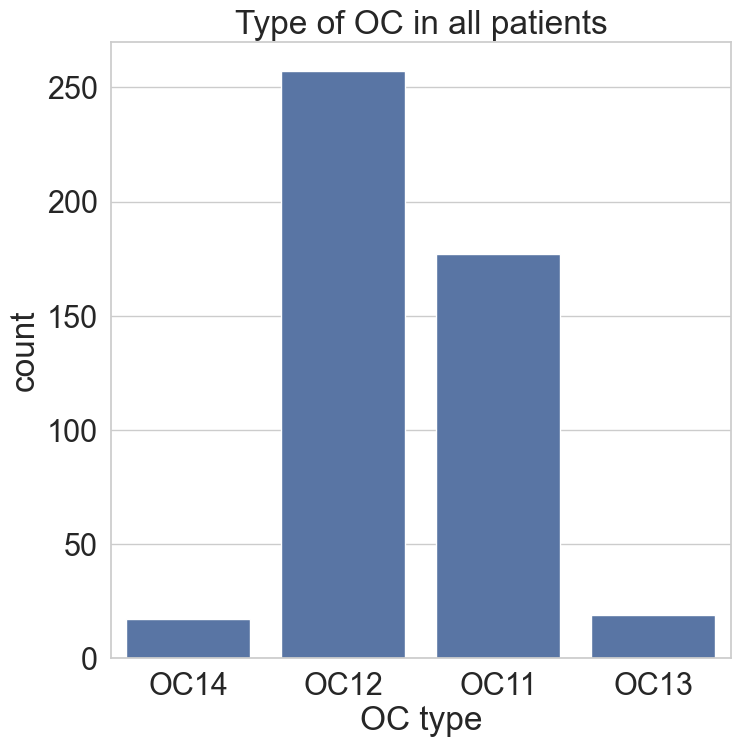

In [14]:
#Observation
#This shows how many patients survived 1 year being a smoker (F,1)
#This shows how many patients survived 1 year without being a smoker (F,0)
#This shows how many patients did not survive 1 year being a smoker (T,1)
#This shows how many patients did not survive 1 year without being a smoker (T,0)
#Type of OC in all patients
# this plot shows count of a given OC in all patients
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of OC in all patients")

sns.set(font_scale=2)
sns.countplot(x= 'PRE14', data = data)
ax.set_xlabel('OC type')

plt.show()


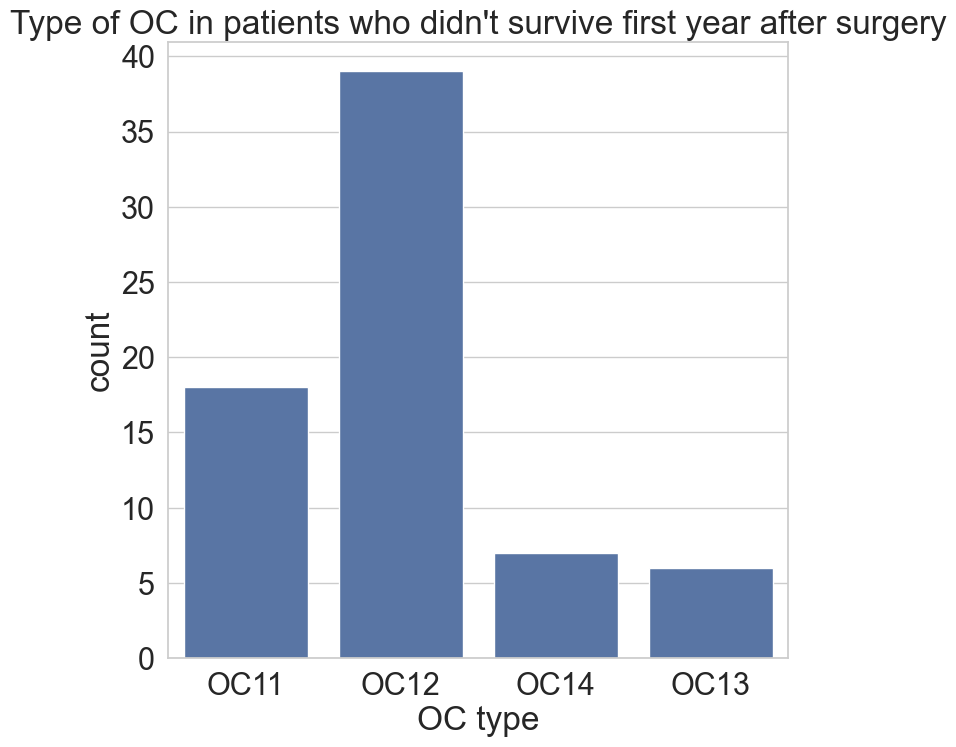

In [15]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=2)
ax.set_title("Type of OC in patients who didn't survive first year after surgery")
sns.countplot(x= 'PRE14',  data =data[data['Risk1Yr'] == 'T'])
ax.set_xlabel('OC type')

plt.show()

In [16]:
data['DGN'].value_counts()

DGN
DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: count, dtype: int64

In [17]:
data['PRE6'].value_counts()

PRE6
PRZ1    313
PRZ0    130
PRZ2     27
Name: count, dtype: int64

In [18]:
data['PRE14'].value_counts()

PRE14
OC12    257
OC11    177
OC13     19
OC14     17
Name: count, dtype: int64

In [19]:
data=data.drop('id',axis=1)

In [20]:
data.DGN=data.DGN.replace({"DGN3":3,"DGN2":2,"DGN4":4,"DGN5":5,"DGN6":0,"DGN8":8,"DGN1":1})
data.PRE6=data.PRE6.replace({"PRZ1":1,"PRZ0":0,"PRZ2":2})
data.PRE14=data.PRE14.replace({"OC12":2,"OC11":1,"OC13":3,"OC14":4})
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_4984\788888966.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\dell\AppData\Local\Temp\ipykernel_4984\788888966.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\dell\AppData\Local\Temp\ipykernel_4984\788888966.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,F
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,F
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,F
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,F
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,T


In [21]:
data.dtypes

DGN          int64
PRE4       float64
PRE5       float64
PRE6         int64
PRE7         int64
PRE8         int64
PRE9         int64
PRE10        int64
PRE11        int64
PRE14        int64
PRE17        int64
PRE19        int64
PRE25        int64
PRE30        int64
PRE32        int64
AGE          int64
Risk1Yr     object
dtype: object

In [22]:
#Creation of a Model
#Take the X and y value
x=data.drop('Risk1Yr',axis=1)
x

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63
466,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61
467,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52
468,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79


In [23]:
y=data.Risk1Yr
y

0      F
1      F
2      F
3      F
4      T
      ..
465    F
466    F
467    F
468    F
469    F
Name: Risk1Yr, Length: 470, dtype: object

In [24]:
y.value_counts()

Risk1Yr
F    400
T     70
Name: count, dtype: int64

In [25]:
#Import the train_test_split from the sklearn
from sklearn.model_selection import train_test_split
#Split the Training Dataset and Test Dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#Import the RandomForestClassifier from the sklearn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
#Fitting the training data to the model
model.fit(x,y)

RandomForestClassifier()

In [26]:
#Prediction
y_predict=model.predict(X_test)
y_predict

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'F', 'T',
       'F', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F',
       'F', 'F', 'F'], dtype=object)

In [27]:
#Accuracy
#Import the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

100.0

In [28]:
from sklearn.metrics import confusion_matrix
performance=confusion_matrix(y_test,y_predict)
performance

array([[83,  0],
       [ 0, 11]])

In [29]:

Overall_Accuracy = "100%"